In [1]:
import pandas as pd
data_test = pd.read_csv("/content/validation_data.csv")
data_train = pd.read_csv("/content/train_data.csv")


In [2]:
data_train


,SMS,LABEL
0,BOLETO REFERENTE AS PARCELAS EM ATRASO DO CONS...,blocked
1,050003DA0202|lcloud-apple-lnc.com/?iphone=VtBq...,blocked
2,060804CB5F0303|ps: //bancodobrasil.seguranca.gq,blocked
3,Atualizacao ainda nao foi executado em sua con...,blocked
4,0608042BE40303|ps://bancodobrasil.seguranca.cf/,blocked
...,...,...
5995,Host : RB_Bicanga Ip: 170.244.231.14 nao esta ...,ok
5996,Host : RB§Bicanga Ip: 170.244.231.14 nao esta ...,ok
5997,Host : RB§Bicanga Ip: 170.244.231.14 nao esta ...,ok
5998,Host : RB_Bicanga Ip: 170.244.231.14 nao esta ...,ok


In [3]:
data_test

,SMS
0,BB informa:Prezado cliente suas senhas de ACES...
1,BB informa:Prezado cliente suas senhas de ACES...
2,BB informa:Prezado cliente suas senhas de ACES...
3,Node Warning: SFRO01H000001.call.br Warning em...
4,BB informa:Prezado cliente suas senhas de ACES...
...,...
1995,Faça login no aplicativo OlympTrad?: 179.240.1...
1996,Faça login no aplicativo OlympTrad?: 179.240.1...
1997,bitnuvem.com: Identificamos acesso do IP 179.2...
1998,"enterinapplication: 179.240.169.116, BR, For..."


In [4]:
data_train.shape

(6000, 2)

In [5]:
data_test.shape

(2000, 1)

In [6]:
data_train.isnull().sum()

SMS      0
LABEL    0
dtype: int64

In [7]:
data_train.duplicated().sum()

141

In [8]:
data_train.nunique()

SMS      5859
LABEL       2
dtype: int64

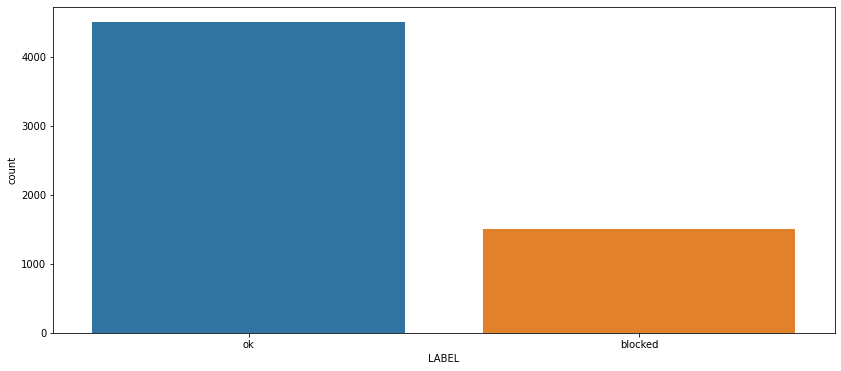

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.countplot(data=data_train, x='LABEL', 
              order=["ok", "blocked"])

(array([  47.,  205.,  343., 1364., 1390.,  166.,  364.,  417., 1094.,
         610.]),
 array([ 13. ,  29.1,  45.2,  61.3,  77.4,  93.5, 109.6, 125.7, 141.8,
        157.9, 174. ]),
 <a list of 10 Patch objects>)

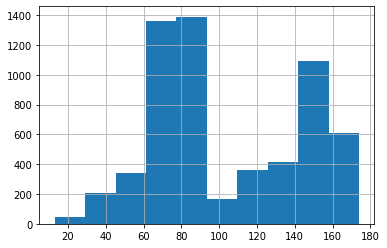

In [27]:
plt.grid()
plt.hist(data_train['SMS'].str.len())

(array([ 23.,  18.,  51., 166., 253., 658.,  37.,  71., 187.,  36.]),
 array([ 13. ,  28.7,  44.4,  60.1,  75.8,  91.5, 107.2, 122.9, 138.6,
        154.3, 170. ]),
 <a list of 10 Patch objects>)

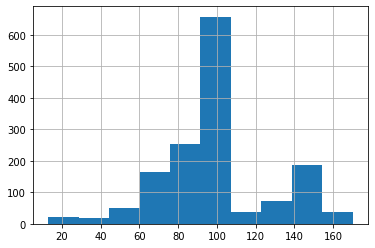

In [28]:
bloqued_data = data_train.query('LABEL == "blocked"')
plt.grid()
plt.hist(bloqued_data['SMS'].str.len())

(array([  61.,  225.,  629., 1151.,  150.,  150.,  330.,  309., 1055.,
         440.]),
 array([ 18. ,  33.6,  49.2,  64.8,  80.4,  96. , 111.6, 127.2, 142.8,
        158.4, 174. ]),
 <a list of 10 Patch objects>)

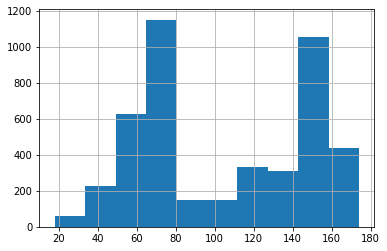

In [30]:
ok_data = data_train.query('LABEL == "ok"')
plt.grid()
plt.hist(ok_data['SMS'].str.len())

In [13]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 6000):
    review = re.sub('[^a-zA-Z]', ' ', data_train['SMS'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()
y = data_train.iloc[:, 1:2].values

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
print(cm)

[[268   2]
 [ 12 918]]


In [20]:
TP = cm[1][1] #true positive
TN = cm[0][0] #true negative
FP = cm[0][1] #false positive
FN = cm[1][0] #false negative

In [21]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Score = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: ' + str(Accuracy))
print('Precision: ' + str(Precision))
print('Recall: ' + str(Recall))
print('Score: ' + str(Score))



Accuracy: 0.9883333333333333
Precision: 0.9978260869565218
Recall: 0.9870967741935484
Score: 0.9924324324324325


#Análise de resultado
Entre os 6000 registros do arquivo train_data.csv, eu separei 20% deles para testar a máquina preditiva, já que não é possível usar os registros do arquivo validation_data.csv para testar, pois o mesmo não têm a classificação ("ok" ou "blocked").
A máquina preditiva foi capaz de acertar os resultados com uma acurácia de 98,8%.

Abaixo está a aplicação do mesmo modelo de máquina preditiva para classificar os registros do arquivo validation_data.

In [22]:
#concatenando os dados data_train e data_set para realizar o NLP
frames = [data_train['SMS'], data_test['SMS']]
X = pd.concat(frames)

In [23]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 6000):
    review = re.sub('[^a-zA-Z]', ' ', str(X[i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]
    review = ' '.join(review)
    corpus.append(review)
X_test = cv.fit_transform(corpus).toarray()
for i in range(0, 2000):
    review = re.sub('[^a-zA-Z]', ' ',data_test['SMS'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]
    review = ' '.join(review)
    corpus.append(review)
X = cv.fit_transform(corpus).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
X_train = X[0:6000]
y_train = y
X_test = X[6000:8000]

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#Esta variável armazena os valores dos registros de teste (arquivo validation_data.csv)
y_pred

array(['blocked', 'blocked', 'blocked', ..., 'ok', 'ok', 'ok'],
      dtype='<U7')